In [1]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.corpus import kolaw
from konlpy.tag import Okt

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_names = gutenberg.fileids()
print(type(file_names), file_names)

<class 'list'> ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
len(doc_alice)

144395

In [4]:
token_alice = word_tokenize(doc_alice.lower())
len(token_alice), token_alice[:10]

(33492,
 ['[',
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  'by',
  'lewis',
  'carroll',
  '1865'])

In [5]:
tokenizer = RegexpTokenizer("[\w']{2,}")
reg_token_alice = tokenizer.tokenize(doc_alice.lower())
len(reg_token_alice), reg_token_alice[:10]

(25768,
 ["alice's",
  'adventures',
  'in',
  'wonderland',
  'by',
  'lewis',
  'carroll',
  '1865',
  'chapter',
  'down'])

In [6]:
lemma = WordNetLemmatizer()
lemma_token_alice = [lemma.lemmatize(token) for token in reg_token_alice]
len(lemma_token_alice), lemma_token_alice[:10]

(25768,
 ["alice's",
  'adventure',
  'in',
  'wonderland',
  'by',
  'lewis',
  'carroll',
  '1865',
  'chapter',
  'down'])

In [7]:
eng_stops = set(stopwords.words('english'))
result_alice = [token for token in lemma_token_alice if token not in eng_stops]
len(result_alice), result_alice[:10]

(13600,
 ["alice's",
  'adventure',
  'wonderland',
  'lewis',
  'carroll',
  '1865',
  'chapter',
  'rabbit',
  'hole',
  'alice'])

In [8]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 462, 'alice': 385, 'wa': 356, 'little': 128, "'i": 126, 'one': 99, 'know': 90, 'like': 86, 'went': 83, 'thing': 80, 'would': 78, 'could': 77, 'time': 77, 'thought': 76, 'queen': 69, 'see': 67, 'king': 62, 'head': 59, 'turtle': 59, 'began': 58, 

In [9]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]
len(my_words), my_words[:10]

(9069,
 ["alice's",
  'adventure',
  'wonderland',
  'carroll',
  'chapter',
  'rabbit',
  'hole',
  'alice',
  'wa',
  'get'])

In [10]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [11]:
alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 462, 'alice': 304, 'wa': 277, 'little': 123, 'went': 83, 'thing': 80, 'time': 77, 'queen': 65, 'turtle': 59, 'began': 58, 'way': 57, 'head': 57, 'thought': 56, 'mock': 55, 'voice': 51, 'gryphon': 50, 'cat': 48, 'rabbit': 45, 'got': 44, 'hatter': 44, 

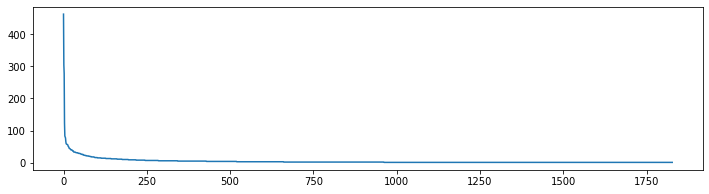

In [13]:
word_count_list = [alice_word_count[key] for key in sorted_word_count]
plt.figure(figsize=(12, 3))
plt.plot(word_count_list)
plt.show()

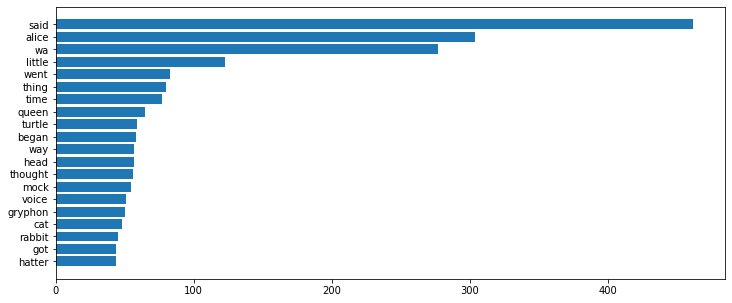

In [17]:
n = sorted_word_count[:20][::-1]
w = [alice_word_count[key] for key in n]
plt.figure(figsize=(12, 5))
plt.barh(range(len(n)), w, tick_label=n)
plt.show()